In [1]:
import numpy as np
from scipy.signal import butter,filtfilt
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,5)

# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [2]:
# NEED TIME ARRAY; SAMPLE CODE DOES NOT PROVIDE

t = np.arange(0,T,1/fs)
len(t)

150

In [3]:
# sin wave
sig = np.sin(1.2*2*np.pi*t)
# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise

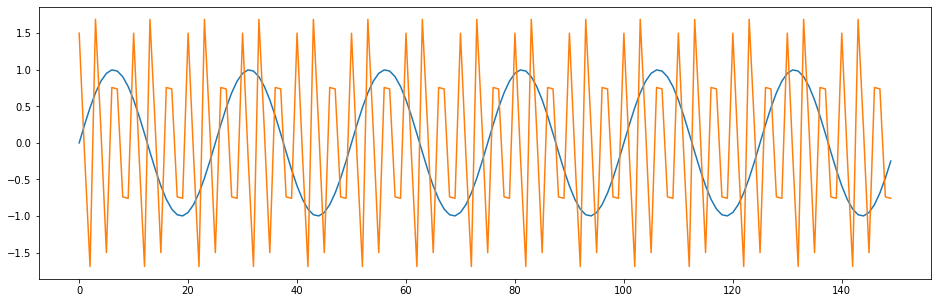

In [4]:
plt.plot(sig)
plt.plot(noise)

In [5]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

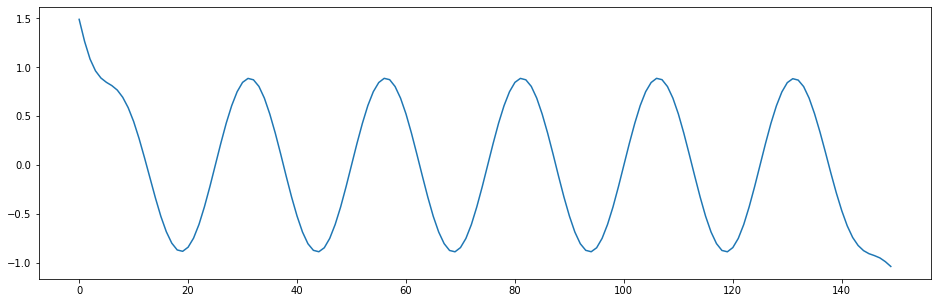

In [6]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.plot(y)